In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina' 

In [11]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install fancyimpute

  Using cached fancyimpute-0.7.0.tar.gz (25 kB)
  Using cached knnimpute-0.1.0.tar.gz (8.3 kB)
  Using cached scikit_learn-1.3.2-cp38-cp38-win_amd64.whl (9.3 MB)

  Using cached cvxpy-1.4.2-cp38-cp38-win_amd64.whl (1.0 MB)
  Using cached cvxopt-1.3.2-cp38-cp38-win_amd64.whl (12.8 MB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Using cached clarabel-0.6.0-cp37-abi3-win_amd64.whl (355 kB)
  Using cached osqp-0.6.3-cp38-cp38-win_amd64.whl (292 kB)
  Using cached ecos-2.0.12-cp38-cp38-win_amd64.whl (72 kB)
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29891 sha256=bb6a3cfda5d608350743c24296bd84d6a4602798d332f996c7d3abee8159a01a
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\45\e1\7c\5f6e503d959df84af6d91e87ae288961a906f895d910f6533b
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11354 sha256=a5436498a0f8eb7a6249f4faa7d6a3ba05cfc53409fa01d1b560eb27abaa7bdc
  Stored in directory: c:\u

In [14]:
import missingno as msno 
from fancyimpute import IterativeImputer
import warnings
warnings.filterwarnings('ignore')

In [16]:
seoulbike=pd.read_csv("C:/Users/Administrator/Downloads/SeoulBikeData_NaN.csv")
df=seoulbike.copy()

In [22]:
df

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,NaN,No Holiday,Yes
8756,8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [18]:
df.isna().sum() #temperature, wind speed, seasons에 동일한 개수의 결측치 발견

Unnamed: 0                     0
Date                           0
Rented Bike Count              0
Hour                           0
Temperature(°C)              876
Humidity(%)                    0
Wind speed (m/s)             876
Visibility (10m)               0
Dew point temperature(°C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                      876
Holiday                        0
Functioning Day                0
dtype: int64

###### msno.matrix(df,figsize=(12,5))

# 제거

In [44]:
df.dropna(subset=['Seasons'])
          #제거 방법으로 876개행 삭제

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
5,5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,8754,30/11/2018,1384,18,4.7,34,1.9,1661,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [46]:
df.dropna(subset=['Temperature(°C)'])

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,NaN,No Holiday,Yes
8756,8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [47]:
df.dropna(subset=["Wind speed (m/s)"])

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
5,5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,NaN,No Holiday,Yes
8756,8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


# 단일대체법

In [36]:
df2=df.copy()
print(f'평균: {round(df["Temperature(°C)"].mean())}')
print(f'중앙값: {df["Temperature(°C)"].median()}')
print(f'최빈값: {df["Temperature(°C)"].mode()[0]}')

평균: 13
중앙값: 13.95
최빈값: 20.5


In [40]:
df2["temperature"]=df["Temperature(°C)"].fillna(round(df["Temperature(°C)"].mean()))

In [41]:
print(f'대체 전: {df["Temperature(°C)"].isna().sum()}')
print(f'대체 후: {df2["temperature"].isna().sum()}')

대체 전: 876
대체 후: 0


In [42]:
print(f'대체 전: {df["Temperature(°C)"].std()}')
print(f'대체 후: {df2["temperature"].std()}')

대체 전: 11.93601661646215
대체 후: 11.323430551458275


In [48]:
df2=df.copy()
print(f'평균: {round(df["Wind speed (m/s)"].mean())}')
print(f'중앙값: {df["Wind speed (m/s)"].median()}')
print(f'최빈값: {df["Wind speed (m/s)"].mode()[0]}')

평균: 2
중앙값: 1.5
최빈값: 1.1


In [50]:
df2["wind"]=df["Wind speed (m/s)"].fillna(round(df["Wind speed (m/s)"].mean()))

In [51]:
print(f'대체 전: {df["Wind speed (m/s)"].isna().sum()}')
print(f'대체 후: {df2["wind"].isna().sum()}')

대체 전: 876
대체 후: 0


In [52]:
print(f'대체 전: {df["Wind speed (m/s)"].std()}')
print(f'대체 후: {df2["wind"].std()}')

대체 전: 1.0361375166363205
대체 후: 0.9863610823218161


# 다중대체법

In [54]:
df._get_numeric_data().corr()["Temperature(°C)"].sort_values()

Snowfall (cm)               -0.221321
Wind speed (m/s)            -0.034464
Visibility (10m)             0.039581
Rainfall(mm)                 0.050215
Hour                         0.116151
Humidity(%)                  0.156094
Solar Radiation (MJ/m2)      0.356539
Rented Bike Count            0.537229
Unnamed: 0                   0.575198
Dew point temperature(°C)    0.912099
Temperature(°C)              1.000000
Name: Temperature(°C), dtype: float64

In [56]:
imputer = IterativeImputer()
imputed_arr=imputer.fit_transform(df[['Snowfall (cm)', 'Wind speed (m/s)', 'Temperature(°C)']])
df2.temperature=pd.DataFrame(imputed_arr, columns=['Snowfall (cm)', 'Wind speed (m/s)', 'Temperature(°C)'])["Temperature(°C)"].round()

In [57]:
print(f'대체 전: {df["Temperature(°C)"].isna().sum()}')
print(f'대체 후: {df2.temperature.isna().sum()}')

대체 전: 876
대체 후: 0


In [58]:
print(f'평균: {round(df2["temperature"].mean())}')
print(f'중앙값: {df2["temperature"].median()}')
print(f'최빈값: {df2["temperature"].mode()[0]}')

평균: 13
중앙값: 14.0
최빈값: 14.0


In [59]:
print(f'대체 전: {df["Temperature(°C)"].std()}')
print(f'대체 후: {df2["temperature"].std()}')

대체 전: 11.93601661646215
대체 후: 11.359437841232152


In [60]:
df._get_numeric_data().corr()["Wind speed (m/s)"].sort_values()

Humidity(%)                 -0.336105
Dew point temperature(°C)   -0.178011
Unnamed: 0                  -0.159671
Temperature(°C)             -0.034464
Rainfall(mm)                -0.019080
Snowfall (cm)               -0.001319
Rented Bike Count            0.116558
Visibility (10m)             0.170671
Hour                         0.284573
Solar Radiation (MJ/m2)      0.331239
Wind speed (m/s)             1.000000
Name: Wind speed (m/s), dtype: float64

In [62]:
imputer = IterativeImputer()
imputed_arr=imputer.fit_transform(df[['Humidity(%)', 'Dew point temperature(°C)', 'Wind speed (m/s)']])
df2.wind=pd.DataFrame(imputed_arr, columns=['Humidity(%)', 'Dew point temperature(°C)', 'Wind speed (m/s)'])["Wind speed (m/s)"].round()

In [63]:
print(f'대체 전: {df["Wind speed (m/s)"].isna().sum()}')
print(f'대체 후: {df2.wind.isna().sum()}')

대체 전: 876
대체 후: 0


In [64]:
print(f'평균: {round(df2["wind"].mean())}')
print(f'중앙값: {df2["wind"].median()}')
print(f'최빈값: {df2["wind"].mode()[0]}')

평균: 2
중앙값: 2.0
최빈값: 1.0


In [65]:
print(f'대체 전: {df["Wind speed (m/s)"].std()}')
print(f'대체 후: {df2["wind"].std()}')

대체 전: 1.0361375166363205
대체 후: 1.037683814117107


# 이상치

In [69]:
df.Seasons.describe()

count       7884
unique         4
top       Spring
freq        1990
Name: Seasons, dtype: object

In [70]:
df["Temperature(°C)"].describe()

count    7884.000000
mean       13.026370
std        11.936017
min       -17.800000
25%         3.600000
50%        13.950000
75%        22.600000
max        39.400000
Name: Temperature(°C), dtype: float64

In [71]:
df["Wind speed (m/s)"].describe()

count    7884.000000
mean        1.727220
std         1.036138
min         0.000000
25%         0.900000
50%         1.500000
75%         2.300000
max         7.400000
Name: Wind speed (m/s), dtype: float64

<AxesSubplot:xlabel='Temperature(°C)'>

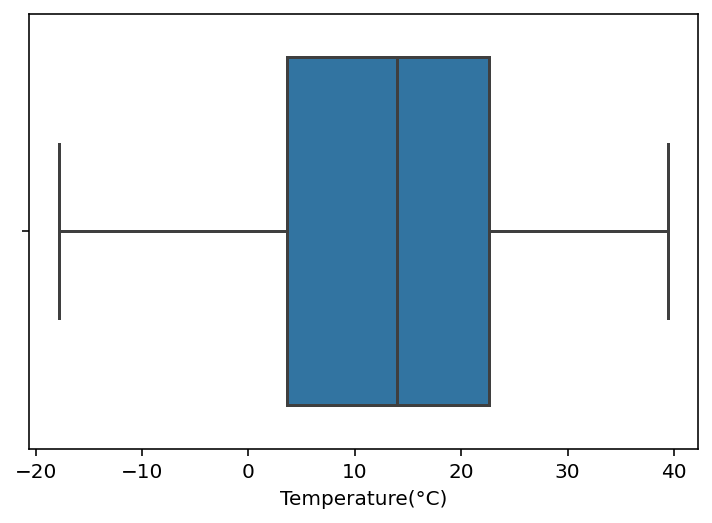

In [72]:
sns.boxplot(df["Temperature(°C)"])

<AxesSubplot:xlabel='Wind speed (m/s)'>

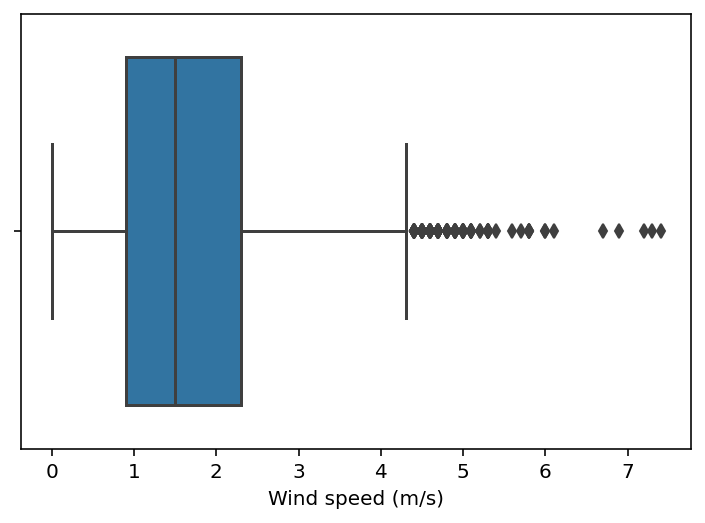

In [73]:
sns.boxplot(df["Wind speed (m/s)"])

<AxesSubplot:xlabel='Wind speed (m/s)'>

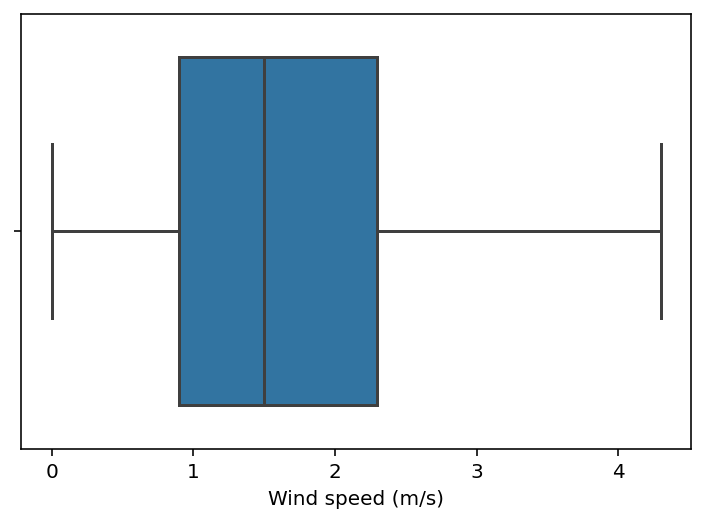

In [83]:
Q1 = df["Wind speed (m/s)"].quantile(0.25)
Q3 = df["Wind speed (m/s)"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df2=df[(df["Wind speed (m/s)"]<upper_bound)&(df["Wind speed (m/s)"]>lower_bound)]
sns.boxplot(df2["Wind speed (m/s)"])

In [84]:
df['Wind speed (m/s)'].unique()

array([2.2, 0.8, 1. , 0.9, nan, 1.5, 1.3, 1.1, 0.5, 1.2, 1.4, 1.6, 2. ,
       3.2, 1.7, 0.6, 2.1, 2.5, 1.8, 2.3, 2.6, 1.9, 2.7, 3.7, 3.4, 3.5,
       4.2, 4.5, 4.1, 4.8, 5.8, 5.3, 3. , 2.8, 0. , 3.1, 2.9, 0.7, 0.4,
       2.4, 3.3, 0.3, 4.3, 4. , 3.9, 4.7, 3.8, 3.6, 5.1, 4.6, 0.1, 5. ,
       4.4, 4.9, 0.2, 6.7, 6. , 5.2, 5.6, 7.4, 7.2, 6.1, 7.3, 5.4, 6.9,
       5.7])

In [85]:
df['Temperature(°C)'].unique()

array([ -5.2,  -5.5,  -6. ,  -6.2,  -6.4,   nan,  -7.4,  -6.5,  -3.5,
        -0.5,   1.7,   2.4,   3. ,   2.1,   1.2,   0.8,   0.6,   0. ,
        -0.3,  -2.2,  -2.9,  -3.8,  -4. ,  -4.4,  -4.2,  -0.4,   1.9,
         4.3,   6. ,   7.3,   7.6,   6.4,   5.5,   5. ,   4.6,   4.1,
         3.5,   4. ,   3.9,   3.3,   3.4,   3.1,   3.2,   4.4,   5.1,
         6.8,   8. ,   6.7,   5.7,   5.2,   4.7,   4.2,   3.6,   2.8,
         2. ,   0.2,  -0.8,  -1.5,  -1.1,   0.1,  -0.1,  -1.3,  -2.1,
        -3.6,  -4.6,  -5.3,  -5.8,  -6.1,  -6.8,  -6.9,  -7.5,  -8.1,
        -7.6,  -2.3,  -1.6,  -0.7,  -2.6,  -3.2,  -3.7,  -2.8,  -2.5,
        -3. ,  -3.4,  -3.3,  -0.9,   1.6,   1.1,   1.3,   1.4,   1.5,
         1. ,  -0.2,   2.3,   3.7,   0.7,  -1.4,  -2.7,  -4.3,  -4.8,
        -7. ,  -6.7,  -2. ,  -1.7,  -2.4,  -3.1,  -4.1,  -4.7,  -5.1,
        -5.4,   2.5,   0.3,   0.4,   0.5,   0.9,   5.4,  -1. ,  -5.6,
        -5.9,  -7.1,  -8.6,  -9.3,  -9.7, -10.2, -10.7, -11. , -11.2,
       -11.5, -11.6,

In [86]:
df.Seasons.unique()

array([nan, 'Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

Seasons와 Temperature(°C)의 연계성이 있을 것이라 생각된다.
두 변수 모두 결측치가 있긴 하나 각 계절별 온도를 추출하여 서로의 결측치를 채울 수 있을 것 같다.